$$ TRESHAN AYESH $$
$$ 190443T $$

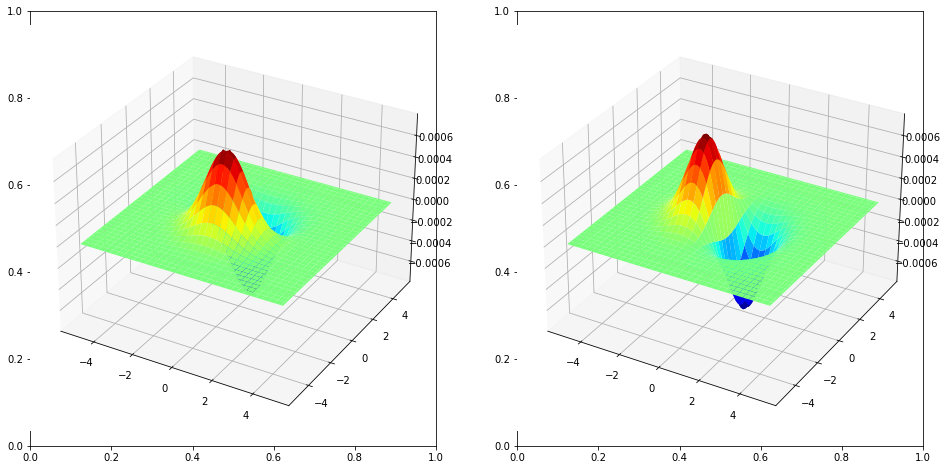

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

delta = 0.1
XX, YY = np.meshgrid(np.arange(-5,5+ delta, delta),np.arange(-5,5+ delta, delta))

sigma = 1
g = np.exp(-(XX**2 + YY**2)/(2*sigma ** 2))
g /= np.sum(g)

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = np.float32)
g_x = cv.filter2D(g,  -1, sobel_v)

sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = np.float32)
g_y = cv.filter2D(g,  -1, sobel_h)


fig,ax = plt.subplots(1,2, figsize = (16,8))
ax1 = fig.add_subplot(121, projection = '3d')
ax2 = fig.add_subplot(122, projection = '3d')

surf1 = ax1.plot_surface(XX, YY, g_x, cmap = cm.jet, linewidth = 0, antialiased = True)
surf2 = ax2.plot_surface(XX, YY , g_y, cmap = cm.jet, linewidth = 0, antialiased = True)


plt.show()



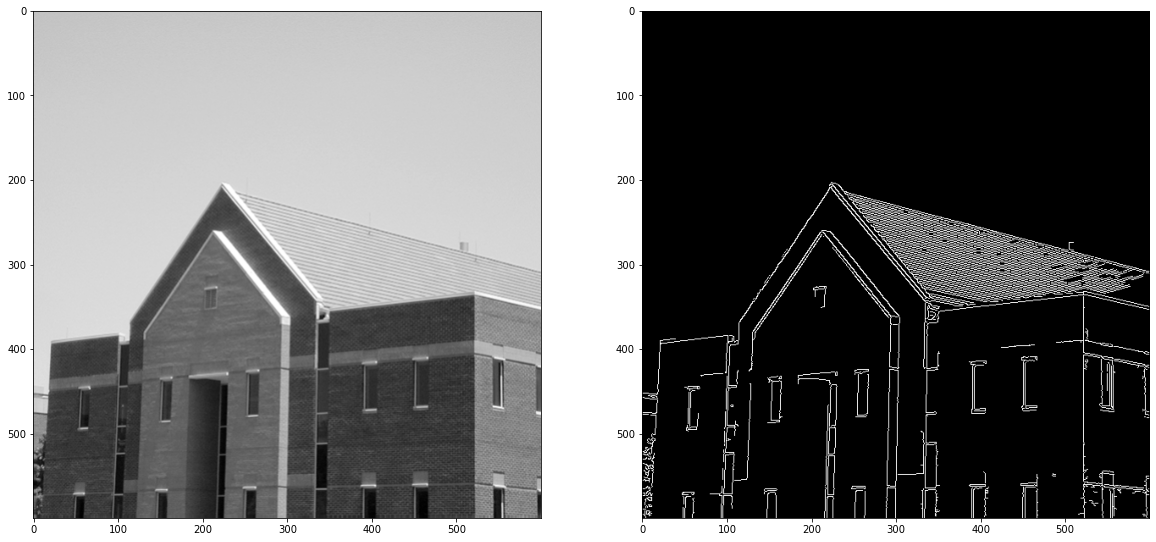

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math



img = cv.imread("building.tif")
assert img is not None

edges = cv.Canny(img, 100, 200)

fig,ax = plt.subplots(1,2, figsize = (20,20))
ax[0].imshow(img , cmap = 'gray')
ax[1].imshow(edges, cmap = 'gray')

plt.show()




In [1]:
import cv2
import math

#canny edge 
hi_threshold_max= 255
title_window = "Canny"

ratio = 0.3
hi_threshold = 255
low_threshold = math.floor(hi_threshold*ratio)

def on_trackbar(val):
    hi_threshold = cv2.getTrackbarPos(trackbar1_name,title_window)
    ratio = cv2.getTrackbarPos(trackbar2_name,title_window)/100.
    low_threshold = hi_threshold*ratio
    edges = cv2.Canny(img,  low_threshold, hi_threshold)
    cv2.imshow(title_window,edges)

img = cv2.imread("building.tif")
if img is None:
    print("Could not open or find the image")
    exit(0)

cv2.namedWindow(title_window)
trackbar1_name = "High Threshold Value"
cv2.createTrackbar(trackbar1_name,title_window,hi_threshold,hi_threshold_max,on_trackbar)
trackbar2_name = "Low Threshold %"
cv2.createTrackbar(trackbar2_name,title_window,1,100,on_trackbar)
on_trackbar(hi_threshold)
cv2.waitKey()
cv2.destroyAllWindows()

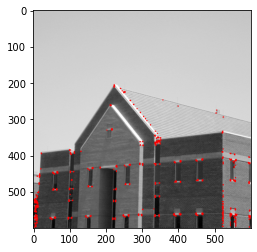

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im = cv.imread('building.tif', cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

dst = cv.dilate(dst, None)
im[dst > 0.01*dst.max()] = [255,0,0]

fig,ax = plt.subplots()
ax.imshow( im)

plt.show()

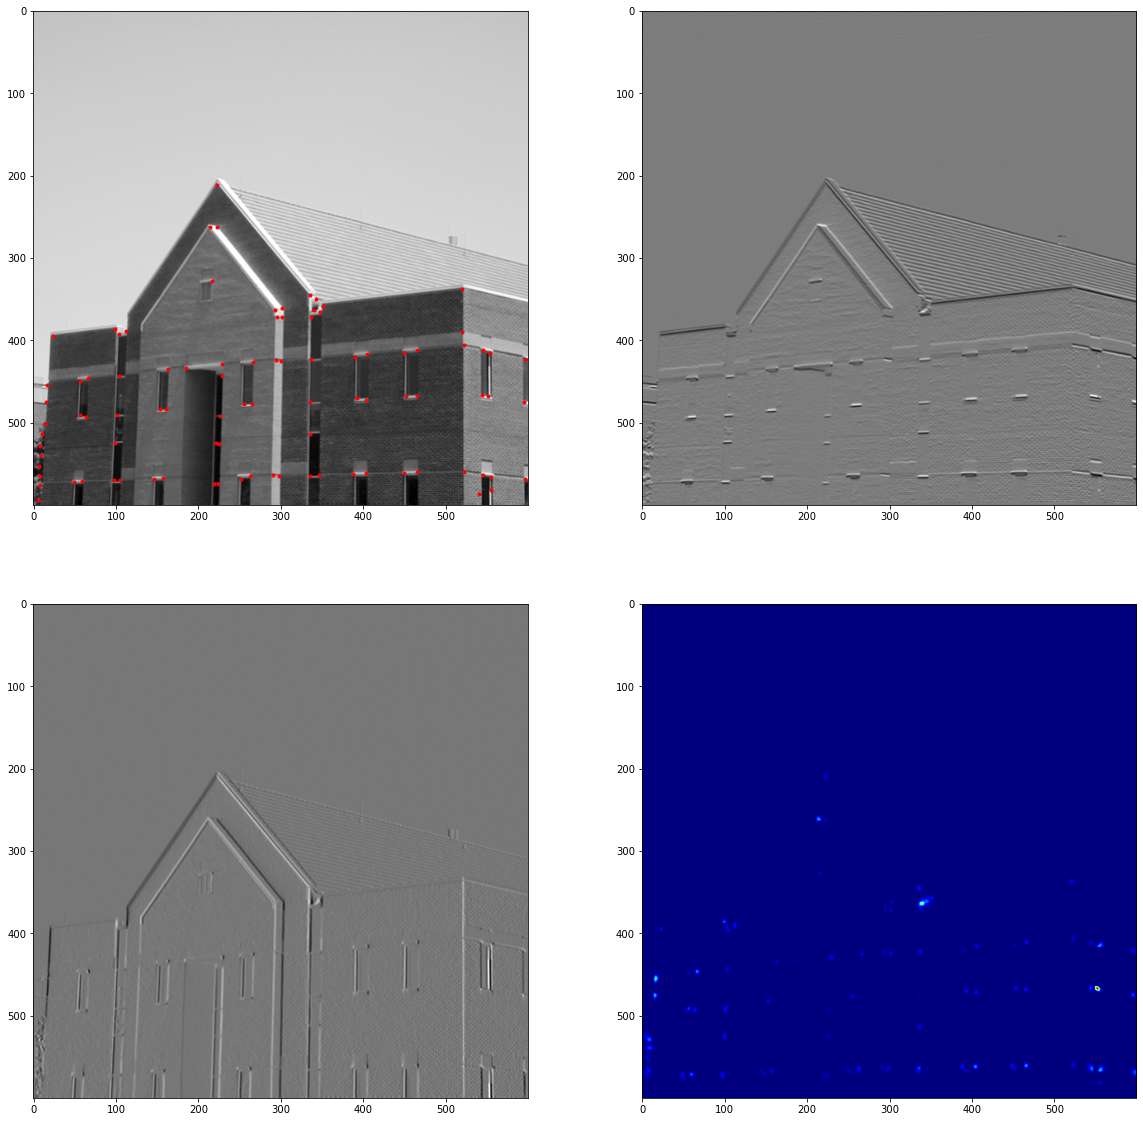

In [12]:
#Implementing cornerHarris from the slides

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from skimage.feature import peak_local_max

im = cv.imread('building.tif', cv.IMREAD_COLOR)
assert im is not None

I = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
I = np.float32(I)

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = np.float32)
sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = np.float32)
Ix = cv.filter2D(I,  -1, sobel_v)
Iy = cv.filter2D(I,  -1, sobel_h)

sigma = 3
ksize = 7
m11 = cv.GaussianBlur(Ix*Ix, (ksize, ksize), sigma)
m12 = cv.GaussianBlur(Ix*Iy, (ksize, ksize), sigma)
m21 = m12
m22 =  cv.GaussianBlur(Iy*Iy, (ksize, ksize), sigma)

det  = m11*m22 - m21*m12
trace = m11 + m22
alpha  = 0.04
R = det - alpha*trace**2

R[R < 1e8] = 0
coordinates = peak_local_max(R, min_distance = 2)

fig,ax = plt.subplots(2,2, figsize = (20,20))

ax[0,0].imshow(im, cmap = 'gray')
ax[0,0].plot( coordinates[:, 1], coordinates[:,0], 'r.')
ax[0,1].imshow(Ix+127, cmap = 'gray')
ax[1,0].imshow(Iy+127, cmap = 'gray')
ax[1,1].imshow(R + 127, cmap = cm.jet)

plt.show()
